Description of the problem:

We are going to estimate the mass of neutrino star:

1) All we already know is that the mass should be between 0 , 33 (our prior knowledge)

2) Through some experiments, we estimate that the mass is -5.4!. But our instrument has a Gaussian error with variance 3.3 (our likelihood)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [m]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 19 seconds.


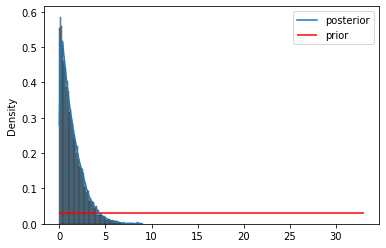

In [4]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

with pm.Model():
    m = pm.Uniform('m',0,33) # m = prior
    obs = pm.Normal('obs',mu = m,sigma=3.3,observed=-5.4)
    trace = pm.sample(20000)
sns.histplot(trace['m'] , stat = 'density', kde = 1)
plt.hlines(1/33,0,33,colors='r')
plt.legend(['posterior','prior'])
plt.show()

In [8]:
import arviz as az
import numpy as np
tracee = trace['m']
a = az.hdi(tracee,hdi_prob=0.95)
aa = [float("{:.2f}".format(a[0])),float("{:.2f}".format(a[1]))]
b = [np.mean(tracee),np.median(tracee)]
print ('95% HD interval: ',aa)
print ('posterior_mean: ',round(b[0],2), '| posterior_median: ',round(b[1],2))

95% HD interval:  [0.0, 3.87]
posterior_mean:  1.4 | posterior_median:  1.07
